In [1]:
# Import Packages
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [2]:
# Import For Plotting (not part of assignment - for my own personal reference)
import matplotlib.pyplot as  plt
%matplotlib inline

In [3]:
%%capture
# Create Data
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [4]:
import numpy as np
# Normalization
mean = np.mean(x_train)
std = np.std(x_train)
x_train_norm = (x_train - mean) / std

mean = np.mean(x_test)
std = np.std(x_test)
x_test_norm = (x_test - mean) / std

In [5]:
%%capture
## Add Noise to Dataset
# Noise is added here

# Generate random noise with the same shape as the image
import numpy as np
mean = 0.0
stddev = 3.0
noise = np.random.normal(mean, stddev, x_train.shape)

# Generate random noise with the same shape as the image
x_train_noise = np.random.normal(mean, stddev, x_train.shape)
x_test_noise = np.random.normal(mean, stddev, x_test.shape)

# Add noise
x_train_noise_added = x_train_noise + x_train_noise
x_test_noise_added  = x_test_noise  + x_test_noise

# Add noise
x_test_noise[1]

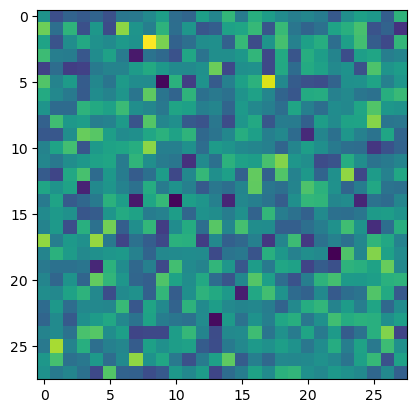

In [6]:
# Verify noises themselves are different
plt.imshow(x_train_noise[1])

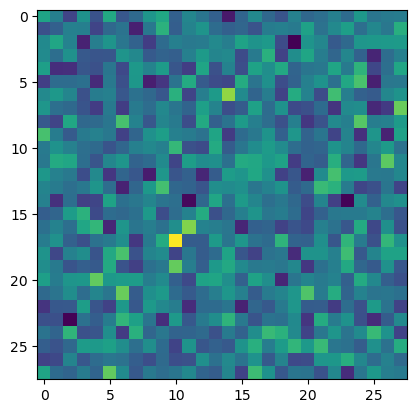

In [7]:
# Comparison to next 'frame' of noise
plt.imshow(x_train_noise[2])

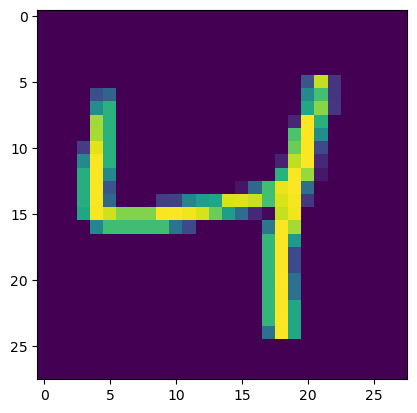

In [8]:
# Compare No-Noise to Noise Image
# Image without noise
plt.imshow(x_train[2])

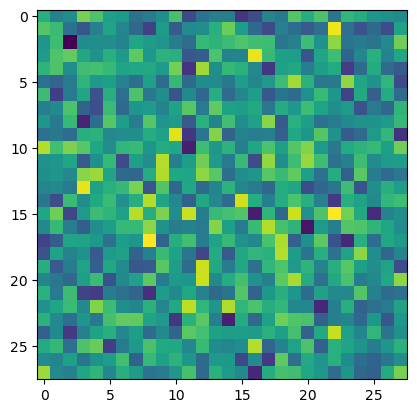

In [23]:
# Same image with noise 
# Noting that I added a significant amount of noise (stddev = 3) to highlight the difference in the models
plt.imshow(x_train_noise_added[2])

In [10]:
# Setup Variables
batch_size = 128
num_classes = 10
epochs = 12

In [11]:
def convolutional_model(batch_size, num_classes, epochs, x_train, x_test, y_train, y_test):

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [12]:
# Run Model With Noise
convolutional_model(batch_size, num_classes, epochs, x_train_noise_added, x_test_noise_added, y_train, y_test)

Epoch 1/12
469/469 [==============================] - 46s 96ms/step - loss: 3.0367 - accuracy: 0.1004 - val_loss: 2.3446 - val_accuracy: 0.1022
Epoch 2/12
469/469 [==============================] - 43s 91ms/step - loss: 2.4623 - accuracy: 0.0999 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 3/12
469/469 [==============================] - 43s 91ms/step - loss: 2.3459 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1052
Epoch 4/12
469/469 [==============================] - 43s 91ms/step - loss: 2.3199 - accuracy: 0.1022 - val_loss: 2.3026 - val_accuracy: 0.1079
Epoch 5/12
469/469 [==============================] - 43s 92ms/step - loss: 2.3123 - accuracy: 0.1026 - val_loss: 2.3026 - val_accuracy: 0.1102
Epoch 6/12
469/469 [==============================] - 43s 92ms/step - loss: 2.3089 - accuracy: 0.1054 - val_loss: 2.3026 - val_accuracy: 0.1117
Epoch 7/12
469/469 [==============================] - 44s 93ms/step - loss: 2.3064 - accuracy: 0.1054 - val_loss: 2.3026 - val_accuracy:

In [13]:
# Run Model Without Noise
convolutional_model(batch_size, num_classes, epochs, x_train, x_test, y_train, y_test)

Epoch 1/12
469/469 [==============================] - 44s 91ms/step - loss: 2.2963 - accuracy: 0.1206 - val_loss: 2.2755 - val_accuracy: 0.2495
Epoch 2/12
469/469 [==============================] - 43s 91ms/step - loss: 2.2632 - accuracy: 0.2123 - val_loss: 2.2356 - val_accuracy: 0.4507
Epoch 3/12
469/469 [==============================] - 44s 95ms/step - loss: 2.2222 - accuracy: 0.3080 - val_loss: 2.1848 - val_accuracy: 0.5364
Epoch 4/12
469/469 [==============================] - 42s 90ms/step - loss: 2.1691 - accuracy: 0.3835 - val_loss: 2.1180 - val_accuracy: 0.6024
Epoch 5/12
469/469 [==============================] - 42s 90ms/step - loss: 2.0970 - accuracy: 0.4409 - val_loss: 2.0255 - val_accuracy: 0.6666
Epoch 6/12
469/469 [==============================] - 45s 97ms/step - loss: 1.9993 - accuracy: 0.4884 - val_loss: 1.8985 - val_accuracy: 0.7083
Epoch 7/12
469/469 [==============================] - 47s 100ms/step - loss: 1.8672 - accuracy: 0.5346 - val_loss: 1.7317 - val_accuracy

Comparing the two models, we see that the addition of noise resultls in a model with a significantly reduced accuracy. In this one, we have an accuracy of .113 with noise and .823 without noise, for the same number of epochs, batch size, etc- the only difference is the noise. As a note, I added a high level of noise (scale of 3.0) to emphasize the difference in the models.   

# Variance Over Different Scale Values

In [14]:
## Add Noise to Dataset
# Noise is added here

def noise_adder(mean, scale_values, x_train, x_test, y_train, y_test):
    
    # Normalization
    mean_norm = np.mean(x_train)
    std = np.std(x_train)
    x_train_norm = (x_train - mean) / std

    mean = np.mean(x_test)
    std = np.std(x_test)
    x_test_norm = (x_test - mean) / std
    
    # Generate random noise with the same shape as the image
    x_train_noise = np.random.normal(loc, scale_values, x_train.shape)
    x_test_noise = np.random.normal(loc, scale_values, x_test.shape)

    # Add noise
    x_train_noise_added = x_train_norm + x_train_noise
    x_test_noise_added  = x_test_norm  + x_test_noise
    
    return x_train_noise_added, x_test_noise_added, y_train, y_test

In [15]:
def convolutional_model_recorder(batch_size, num_classes, epochs, x_train, x_test, y_train, y_test):

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    # Append Loss & Accuracy To List 
    test_loss = score[0]
    test_accuracy = score[1]
    loss_values.append(test_loss)
    accuracy_values.append(test_accuracy)

In [16]:
scale_values = [0.1, 0.5, 1.0, 2.0, 4.0]  # Values given 
loc = 0 # For the noise_adder function
# Initializing Lists
loss_values = []
accuracy_values = []

In [17]:
# Loop:     
for scale in scale_values:
    x_train_noise_added, x_test_noise_added, _, _ = noise_adder(loc, scale, x_train, x_test, y_train, y_test)
    convolutional_model_recorder(batch_size, num_classes, epochs, x_train_noise_added, x_test_noise_added, y_train, y_test)

Epoch 1/12
469/469 [==============================] - 50s 105ms/step - loss: 2.2025 - accuracy: 0.1934 - val_loss: 2.0304 - val_accuracy: 0.5327
Epoch 2/12
469/469 [==============================] - 50s 107ms/step - loss: 1.9506 - accuracy: 0.3642 - val_loss: 1.7752 - val_accuracy: 0.6816
Epoch 3/12
469/469 [==============================] - 46s 98ms/step - loss: 1.7042 - accuracy: 0.4857 - val_loss: 1.5104 - val_accuracy: 0.7511
Epoch 4/12
469/469 [==============================] - 43s 92ms/step - loss: 1.4767 - accuracy: 0.5657 - val_loss: 1.2693 - val_accuracy: 0.7851
Epoch 5/12
469/469 [==============================] - 42s 91ms/step - loss: 1.2820 - accuracy: 0.6235 - val_loss: 1.0770 - val_accuracy: 0.8095
Epoch 6/12
469/469 [==============================] - 42s 90ms/step - loss: 1.1369 - accuracy: 0.6611 - val_loss: 0.9297 - val_accuracy: 0.8296
Epoch 7/12
469/469 [==============================] - 41s 87ms/step - loss: 1.0243 - accuracy: 0.6920 - val_loss: 0.8212 - val_accurac

Epoch 8/12
469/469 [==============================] - 46s 99ms/step - loss: 2.2424 - accuracy: 0.1687 - val_loss: 2.1871 - val_accuracy: 0.2720
Epoch 9/12
469/469 [==============================] - 42s 90ms/step - loss: 2.2243 - accuracy: 0.1789 - val_loss: 2.1523 - val_accuracy: 0.2893
Epoch 10/12
469/469 [==============================] - 42s 91ms/step - loss: 2.2055 - accuracy: 0.1920 - val_loss: 2.1182 - val_accuracy: 0.3137
Epoch 11/12
469/469 [==============================] - 43s 91ms/step - loss: 2.1804 - accuracy: 0.2031 - val_loss: 2.0771 - val_accuracy: 0.3371
Epoch 12/12
469/469 [==============================] - 43s 91ms/step - loss: 2.1549 - accuracy: 0.2210 - val_loss: 2.0374 - val_accuracy: 0.3513
Test loss: 2.037432909011841
Test accuracy: 0.3513000011444092


In [18]:
loss_values

[0.5467995405197144,
 0.6266005635261536,
 0.8344602584838867,
 1.12745201587677,
 2.037432909011841]

In [19]:
accuracy_values

[0.8823000192642212,
 0.8600999712944031,
 0.8125,
 0.673799991607666,
 0.3513000011444092]

In [20]:
# Compile Loss and Accuracy statistics for the models into a single data frame 
import pandas as pd
accuracy_loss_results_dataframe = pd.DataFrame({'scale_values': scale_values, 'loss_values': loss_values, 'accuracy_values': accuracy_values})
accuracy_loss_results_dataframe

,scale_values,loss_values,accuracy_values
0,0.1,0.546800,0.8823
1,0.5,0.626601,0.8601
2,1.0,0.834460,0.8125
3,2.0,1.127452,0.6738
4,4.0,2.037433,0.3513


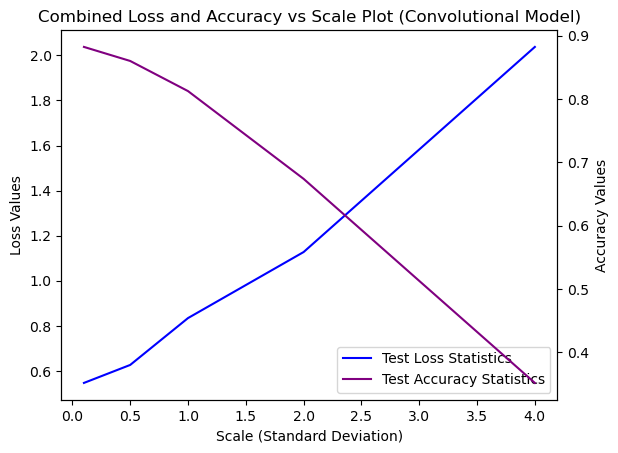

In [21]:
# Plotting Results
fig, ax1 = plt.subplots()
loss_line = ax1.plot(scale_values, loss_values, color = 'blue', label = 'Test Loss Statistics')

# Loss line Plot
ax1.set_xlabel('Scale (Standard Deviation)')
ax1.set_ylabel('Loss Values')
ax1.set_title('Combined Loss and Accuracy vs Scale Plot (Convolutional Model)')

# Accuracy line Plot
ax2 = ax1.twinx()
accuracy_line = ax2.plot(scale_values, accuracy_values, color='purple', label='Test Accuracy Statistics')
ax2.set_ylabel('Accuracy Values')

# Combine Both Lines Into One Plot
lines = loss_line + accuracy_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

We see a pattern in form of an inverse relationship between the scale of the noise and the accuracy of the model; with every gradual increase in noise, the accuracy of the created model becomes less and less. The most notable dropoff comes from the jump from a scale of 2 to 4, where the accuracy declines from just under .7 to less than .4. In last week's results (after revision), we had the same general realtionship, with the acuracy of the model decreasing as the scale of the noise added increased. It is both sound on the basis of the convolutional neural network model that the addition of noise results in a less accurate model, and the accuracy statistics generated by these models are proof of the same. 